In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
df = pd.read_csv('C:\\Users\\Admin\\Documents\\dataSet\\salesData\\Retail.csv')
df.head()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297


In [112]:
df = df.map(lambda x : np.nan if x == 'nan' or x == 'NaN' else x)
df.tail()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
32035,SO61267,"Touring-1000 Blue, 60",Blue,Bikes,Touring Bikes,2384.07,6/30/2013,07-12-2013,07-07-2013,No Discount,Northwest,2,1430.442,2860.884,0.0,228.8707,71.5221
32036,SO61267,"Touring-2000 Blue, 60",Blue,Bikes,Touring Bikes,1214.85,6/30/2013,07-12-2013,07-07-2013,No Discount,Northwest,1,728.910,728.910,0.0,58.3128,18.2228
32037,SO61267,"HL Touring Frame - Blue, 60",Blue,Components,Touring Frames,1003.91,6/30/2013,07-12-2013,07-07-2013,No Discount,Northwest,2,602.346,1204.692,0.0,96.3754,30.1173
32038,SO61267,"Touring-2000 Blue, 54",Blue,Bikes,Touring Bikes,1214.85,6/30/2013,07-12-2013,07-07-2013,No Discount,Northwest,2,728.910,1457.820,0.0,116.6256,36.4455
32039,SO61268,"LL Touring Frame - Yellow, 50",Yellow,Components,Touring Frames,333.42,6/30/2013,07-12-2013,07-07-2013,No Discount,Southwest,3,200.052,600.156,0.0,48.0125,15.0039


In [128]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29039 entries, 0 to 32039
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderNumber     29039 non-null  object        
 1   ProductName     29039 non-null  object        
 2   Color           29039 non-null  object        
 3   Category        29039 non-null  object        
 4   Subcategory     29039 non-null  object        
 5   ListPrice       29039 non-null  float64       
 6   Orderdate       29039 non-null  datetime64[ns]
 7   Duedate         29039 non-null  datetime64[ns]
 8   Shipdate        29039 non-null  datetime64[ns]
 9   PromotionName   29039 non-null  object        
 10  SalesRegion     29039 non-null  object        
 11  OrderQuantity   29039 non-null  object        
 12  UnitPrice       29039 non-null  float64       
 13  SalesAmount     29039 non-null  float64       
 14  DiscountAmount  29039 non-null  float64       
 15  TaxAmou

In [129]:
df['Orderdate'] = pd.to_datetime(df['Orderdate'],format='mixed')
df['Duedate'] = pd.to_datetime(df['Duedate'],format='mixed')
df['Shipdate'] = pd.to_datetime(df['Shipdate'],format='mixed')

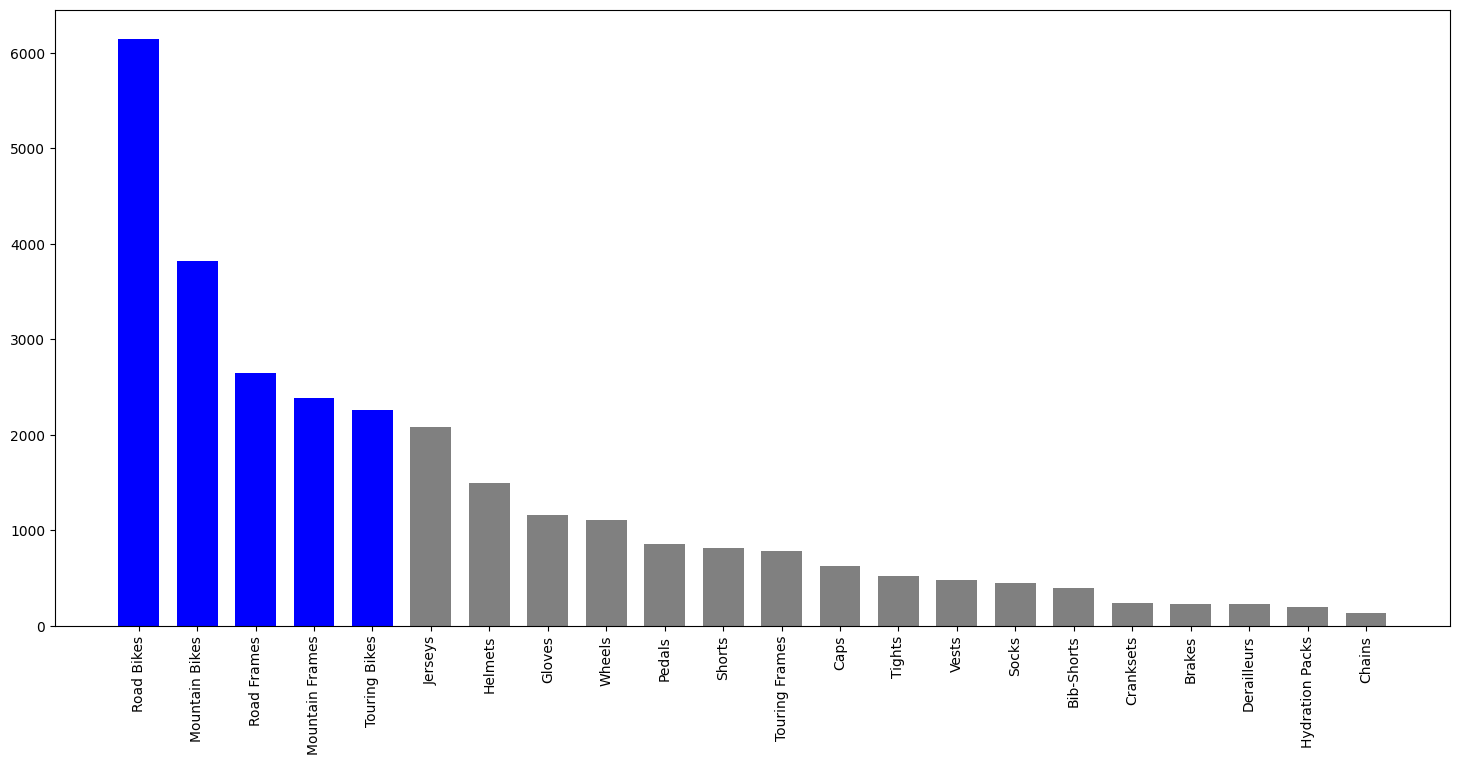

In [130]:
cate = df.loc[:,'Subcategory']
sub_cate  = cate.groupby(cate).size()
sub_cate = sub_cate.sort_values(ascending=False)
color = ['blue' if i < 5 else 'gray' for i in range(len(sub_cate))]
plt.figure(figsize=(18,8))
plt.bar(sub_cate.index,height=sub_cate.values,width=0.7,color=color)
plt.xticks(rotation = 90)
plt.show()

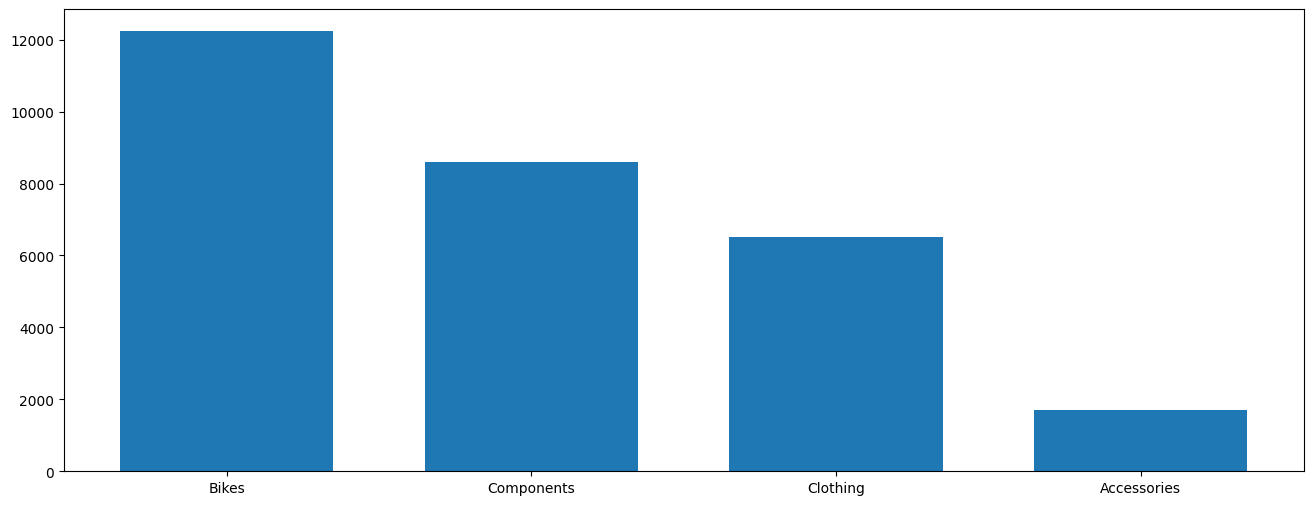

In [131]:
Processes_df = df.copy()
cate = df.loc[:,'Category']
cate = cate.groupby(cate).size()
cate = cate.sort_values(ascending=False)
plt.figure(figsize=(16,6))
plt.bar(cate.index,height=cate.values,width=0.7)
plt.show()


# Observation
<ul><li>products related to travel and vehicles are tend to be sold more</li>
<li>From the graph we can say that Bikes are sold more followed by Frames and jerseys.</li>
<li>Bikes and components are most sold items followed by clothing and Accsddories</li>
</ul>

In [132]:
dates = df.loc[:,['Orderdate','Subcategory']]
dates

,Orderdate,Subcategory
0,2011-01-29,Mountain Bikes
1,2011-01-29,Mountain Bikes
2,2011-01-29,Mountain Frames
4,2011-01-29,Mountain Frames
5,2011-01-29,Mountain Frames
...,...,...
32035,2013-06-30,Touring Bikes
32036,2013-06-30,Touring Bikes
32037,2013-06-30,Touring Frames
32038,2013-06-30,Touring Bikes


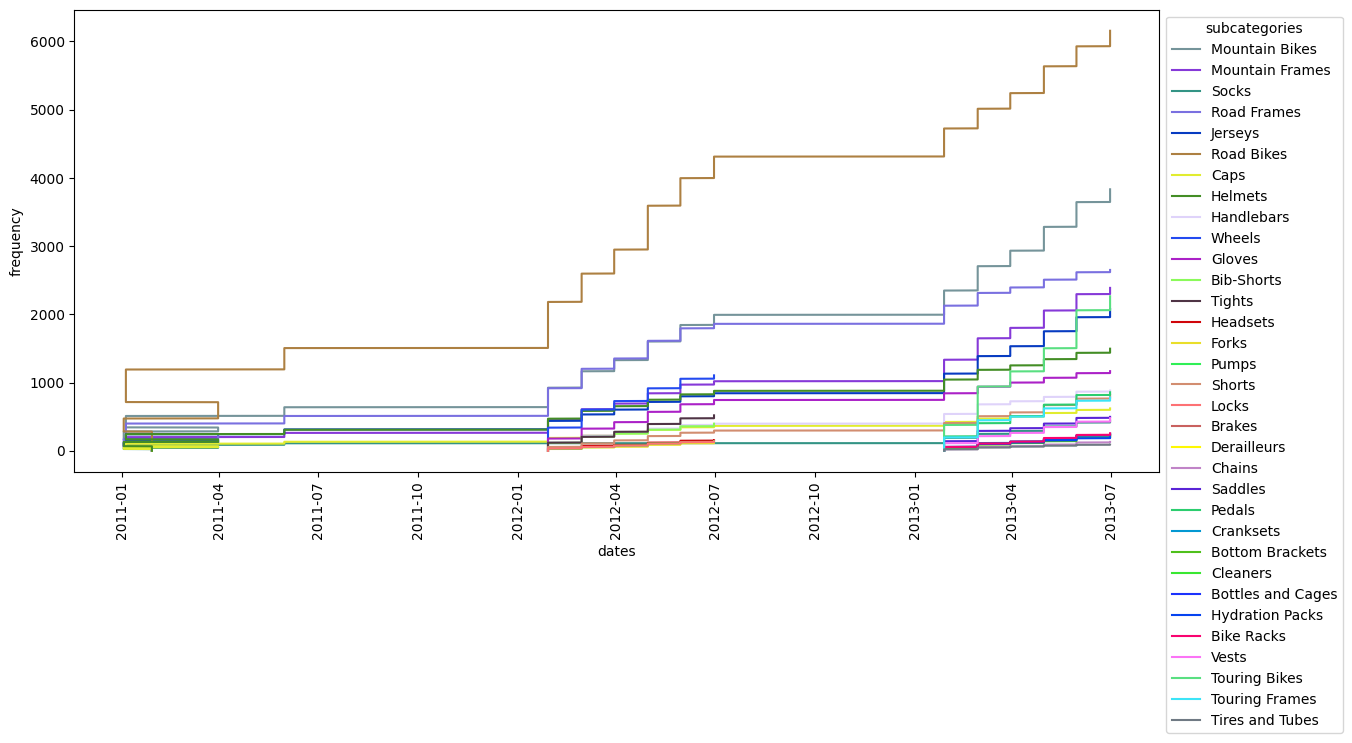

In [15]:
products = dates['Subcategory'].unique()
plt.figure(figsize=(14,6))
for pro in products:
    xvals = dates[dates['Subcategory'] == pro]
    plt.plot(xvals['Orderdate'],range(len(xvals)),label = pro,color=(np.random.random(), np.random.random(), np.random.random()))
plt.xlabel('dates')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.legend(title='subcategories',loc='upper left',bbox_to_anchor = (1,1))

In [16]:
def generate_dark_color():
    return (np.random.uniform(0, 0.4), np.random.uniform(0, 0.4), np.random.uniform(0, 0.4))

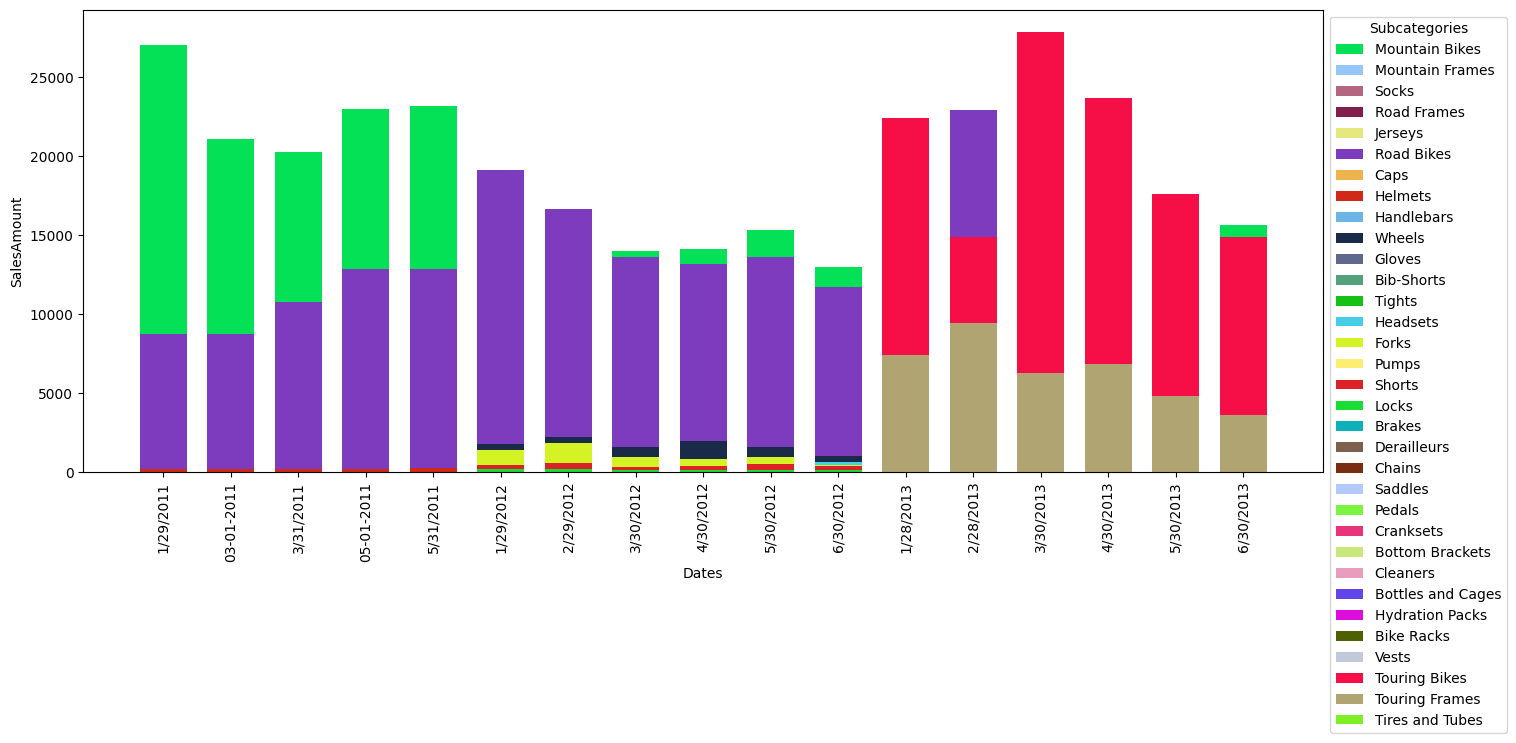

In [85]:
sales = df.loc[:,['Subcategory','SalesAmount','Orderdate']]
palette = sns.color_palette("dark", len(sales.columns))
grp = sales.groupby('Subcategory')
plt.figure(figsize=(16,6))
for pro in sales['Subcategory'].unique():
    vals = sales[sales['Subcategory'] == pro]
    plt.bar(vals['Orderdate'],vals['SalesAmount'],width=0.7,label = pro,color = (np.random.random(), np.random.random(), np.random.random()))
plt.xlabel('Dates')
plt.ylabel('SalesAmount')
plt.xticks(rotation = 90)
plt.legend(title='Subcategories',loc='upper left',bbox_to_anchor = (1,1))

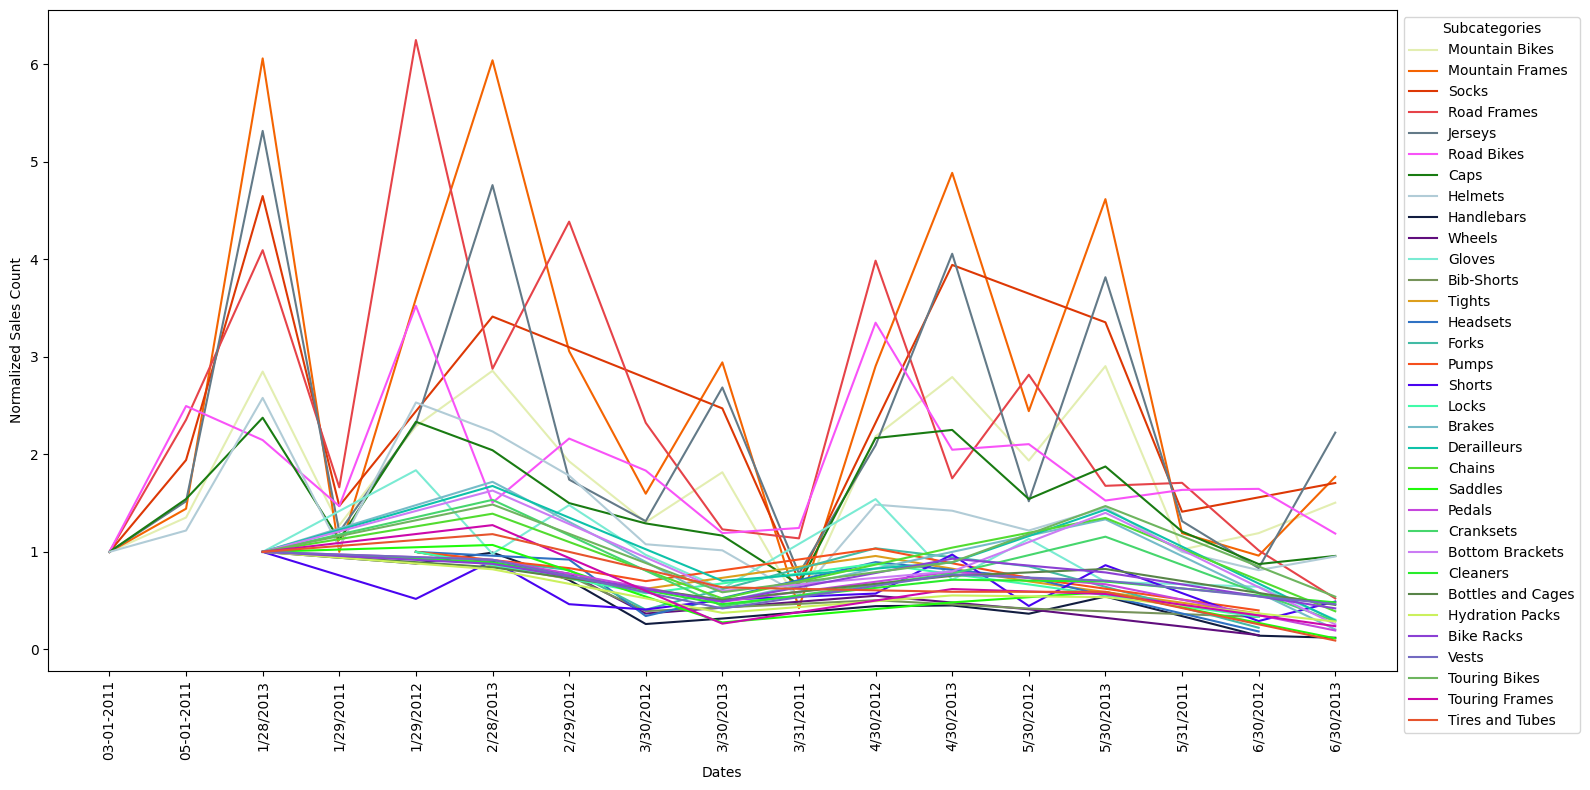

In [ ]:
#Normalised sales count of each products with respect to date
plt.figure(figsize=(16,8))
for pro in sales['Subcategory'].unique():
    grp_date= grp.get_group(pro).groupby('Orderdate').size()
    if grp_date.iloc[0] != 0: 
        values = grp_date / grp_date.iloc[0]
    else:
        values = grp_date
    plt.plot(grp_date.index,values,label = pro,color = (np.random.random(), np.random.random(), np.random.random()))
plt.xlabel('Dates')
plt.ylabel('Normalized Sales Count')
plt.xticks(rotation = 90)
plt.legend(title='Subcategories',loc='upper left',bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

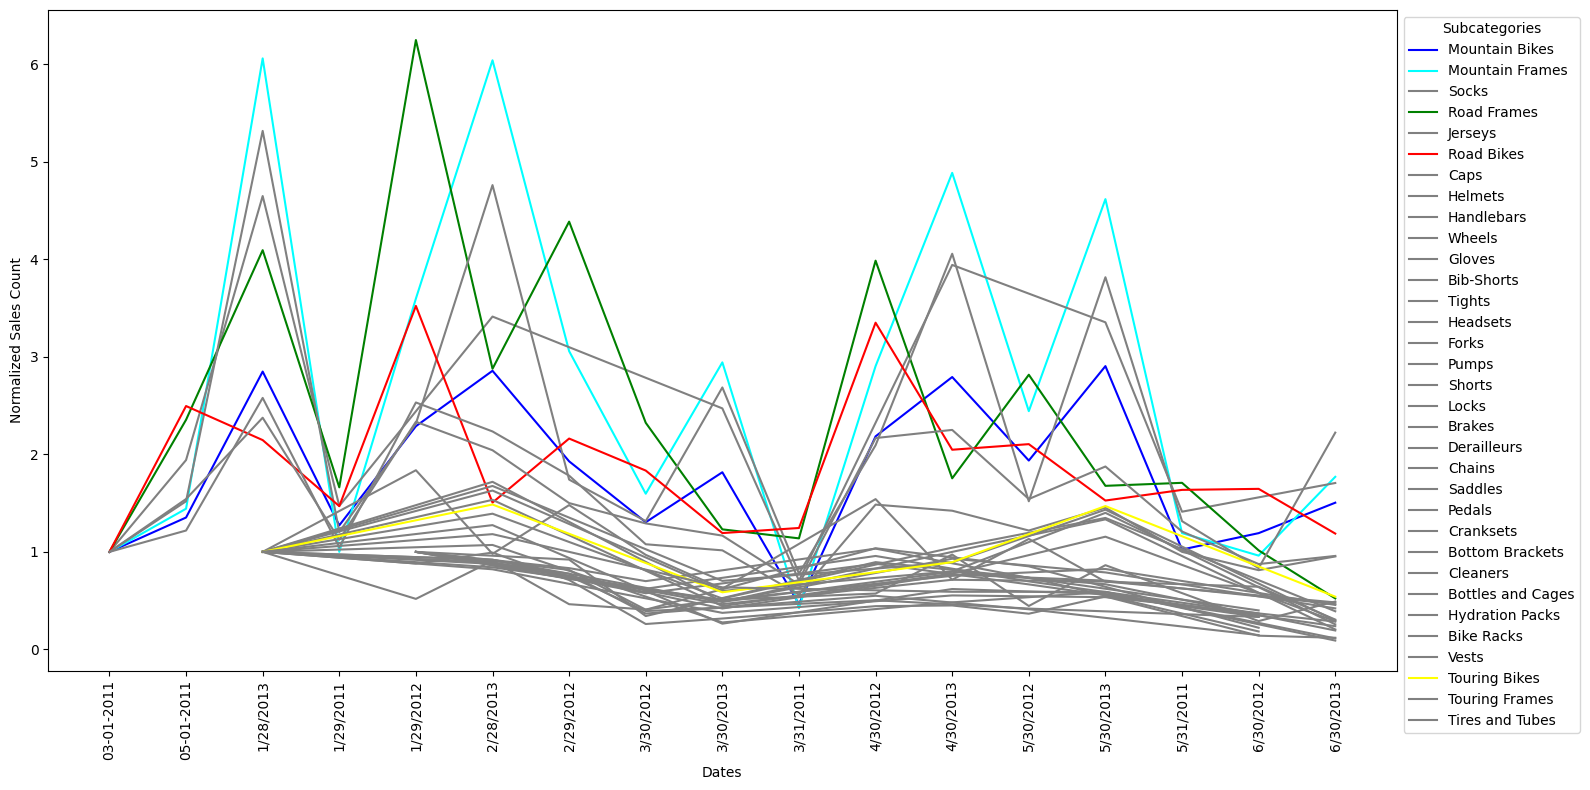

In [102]:
#Top 5 best selleing products with respect to date
total_counts = sales.groupby('Subcategory').size()
top_3_subcategories = total_counts.nlargest(5).index 


top_colors = {
    top_3_subcategories[0]: 'red',
    top_3_subcategories[1]: 'blue',
    top_3_subcategories[2]: 'green',
    top_3_subcategories[3]: 'cyan',
    top_3_subcategories[4]: 'yellow',
}

plt.figure(figsize=(16, 8))

for pro in sales['Subcategory'].unique():
    grp_date = grp.get_group(pro).groupby('Orderdate').size()
    if grp_date.iloc[0] != 0: 
        values = grp_date / grp_date.iloc[0]
    else:
        values = grp_date
    color = top_colors[pro] if pro in top_3_subcategories else 'grey'    
    plt.plot(grp_date.index, values, label=pro, color=color)

plt.xlabel('Dates')
plt.ylabel('Normalized Sales Count')
plt.xticks(rotation=90)
plt.legend(title='Subcategories', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

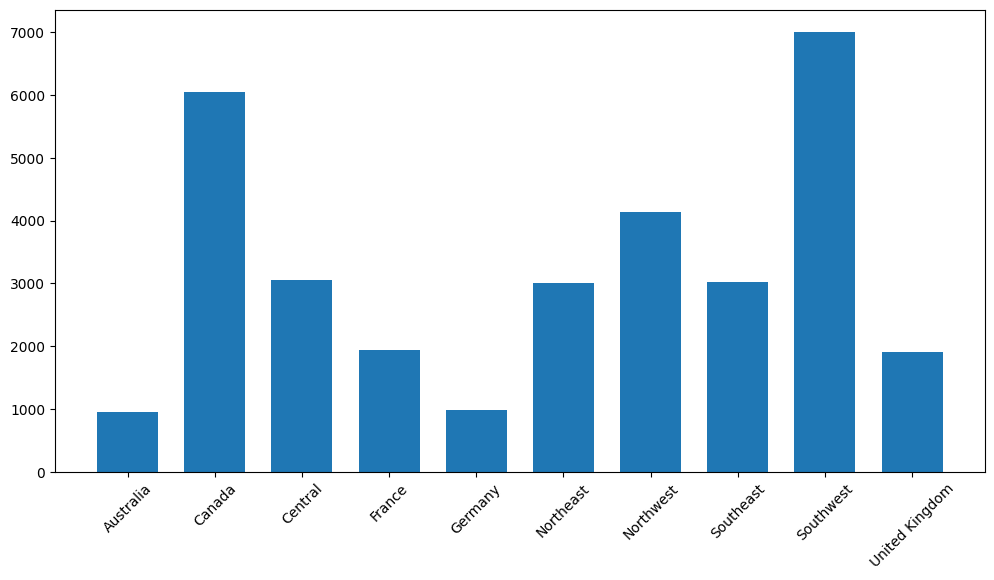

In [5]:
salesRegionOrder = df.loc[:,['Orderdate','SalesRegion','SalesAmount','PromotionName']]
salesAreaCount = salesRegionOrder.groupby('SalesRegion').size()
plt.figure(figsize=(12,6))
plt.bar(salesAreaCount.index,height=salesAreaCount.values,width=0.7)
plt.xticks(rotation = 45)
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'No Discount'),
  Text(1, 0, 'Road-650 Overstock'),
  Text(2, 0, 'Touring-1000 Promotion'),
  Text(3, 0, 'Touring-3000 Promotion'),
  Text(4, 0, 'Volume Discount 11 to 14'),
  Text(5, 0, 'Volume Discount 15 to 24'),
  Text(6, 0, 'Volume Discount 25 to 40')])

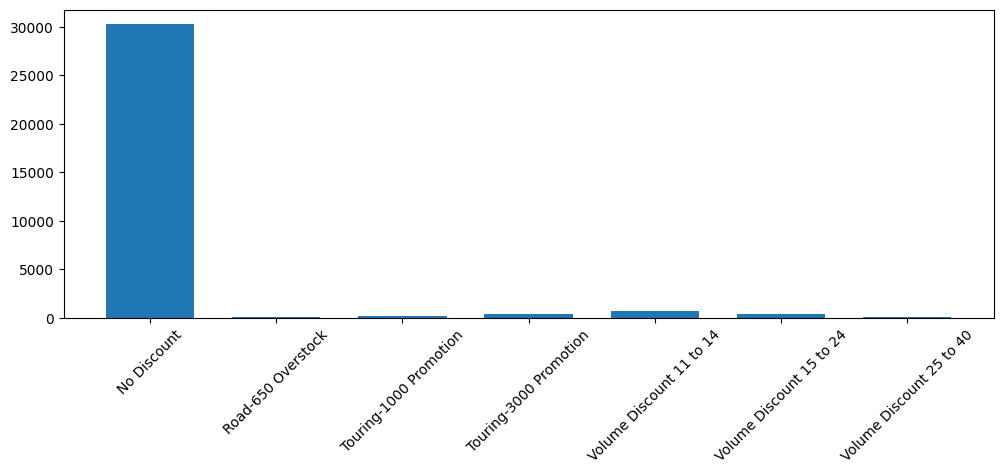

In [68]:
grp = salesRegionOrder.groupby('PromotionName').size()
plt.figure(figsize=(12,4))
plt.bar(grp.index,height=grp.values,width=0.7)
plt.xticks(rotation = 45)


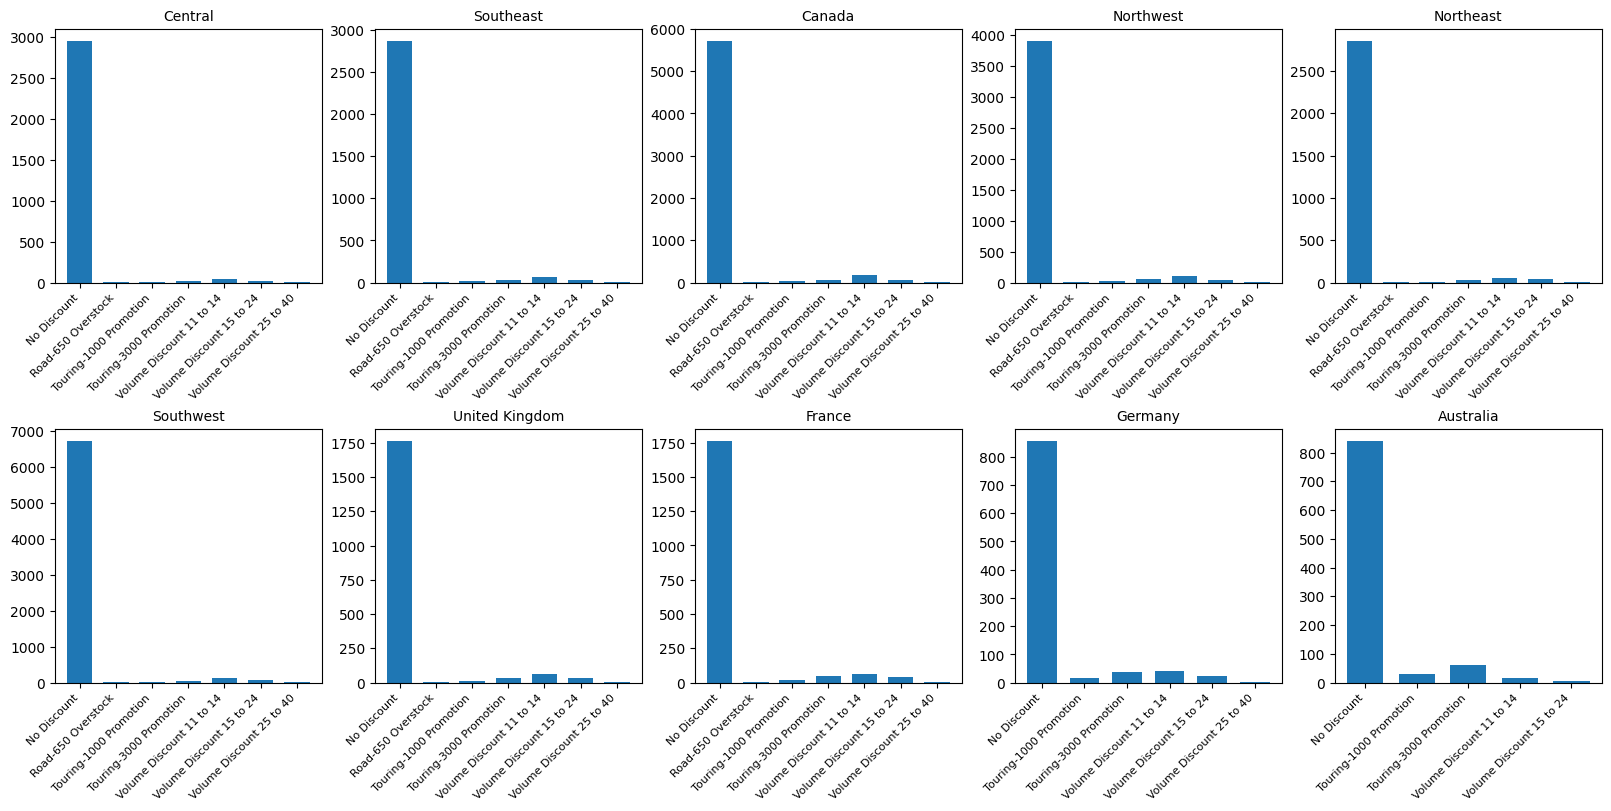

In [54]:
grp = salesRegionOrder.groupby('SalesRegion')
cols = salesRegionOrder['SalesRegion'].dropna().unique()

fig,axes = plt.subplots(2,5,figsize = (16,8),constrained_layout=True)
axes =axes.flatten()
for col,ax in zip(cols,axes):   
    cen = grp.get_group(col).groupby('PromotionName').size()
    ax.bar(cen.index,height=cen.values,width=0.7)
    ax.set_title(col, fontsize=10)
    ax.set_xticks(range(len(cen.index)))
    ax.set_xticklabels(cen.index, rotation=45, ha='right', fontsize=8)

plt.show()

# Observation
<ul><li>There is a sharp increase in sales from  2012-02 to 2012-07  and  2013-02 to 2013-07 on most of products</li>
<li> form 2011-01 to 2011-06  Road Bikes and Mountain Bikes had sold with highest cost </li>
<li> form 2012-02 to 2012-07  Road Bikes had sold with highest cost and sales of Road Bikes was very good </li>
<li> form 2013-02 to 2013-07  Touring Bikes,Road Bikes and Touring Frames had sold with highest cost but sales of Mountain Bikes,Road Bikes,Road Frames was very good </li>
<li>In overall sales Road bikes,Mountain bikes,Road Frames done good</li>
<li>Most sales are done in SouthWest and canada followed by Northwest,central and Northeast </li>
<li> Offering discount did not attract the sales </li>
 </ul>


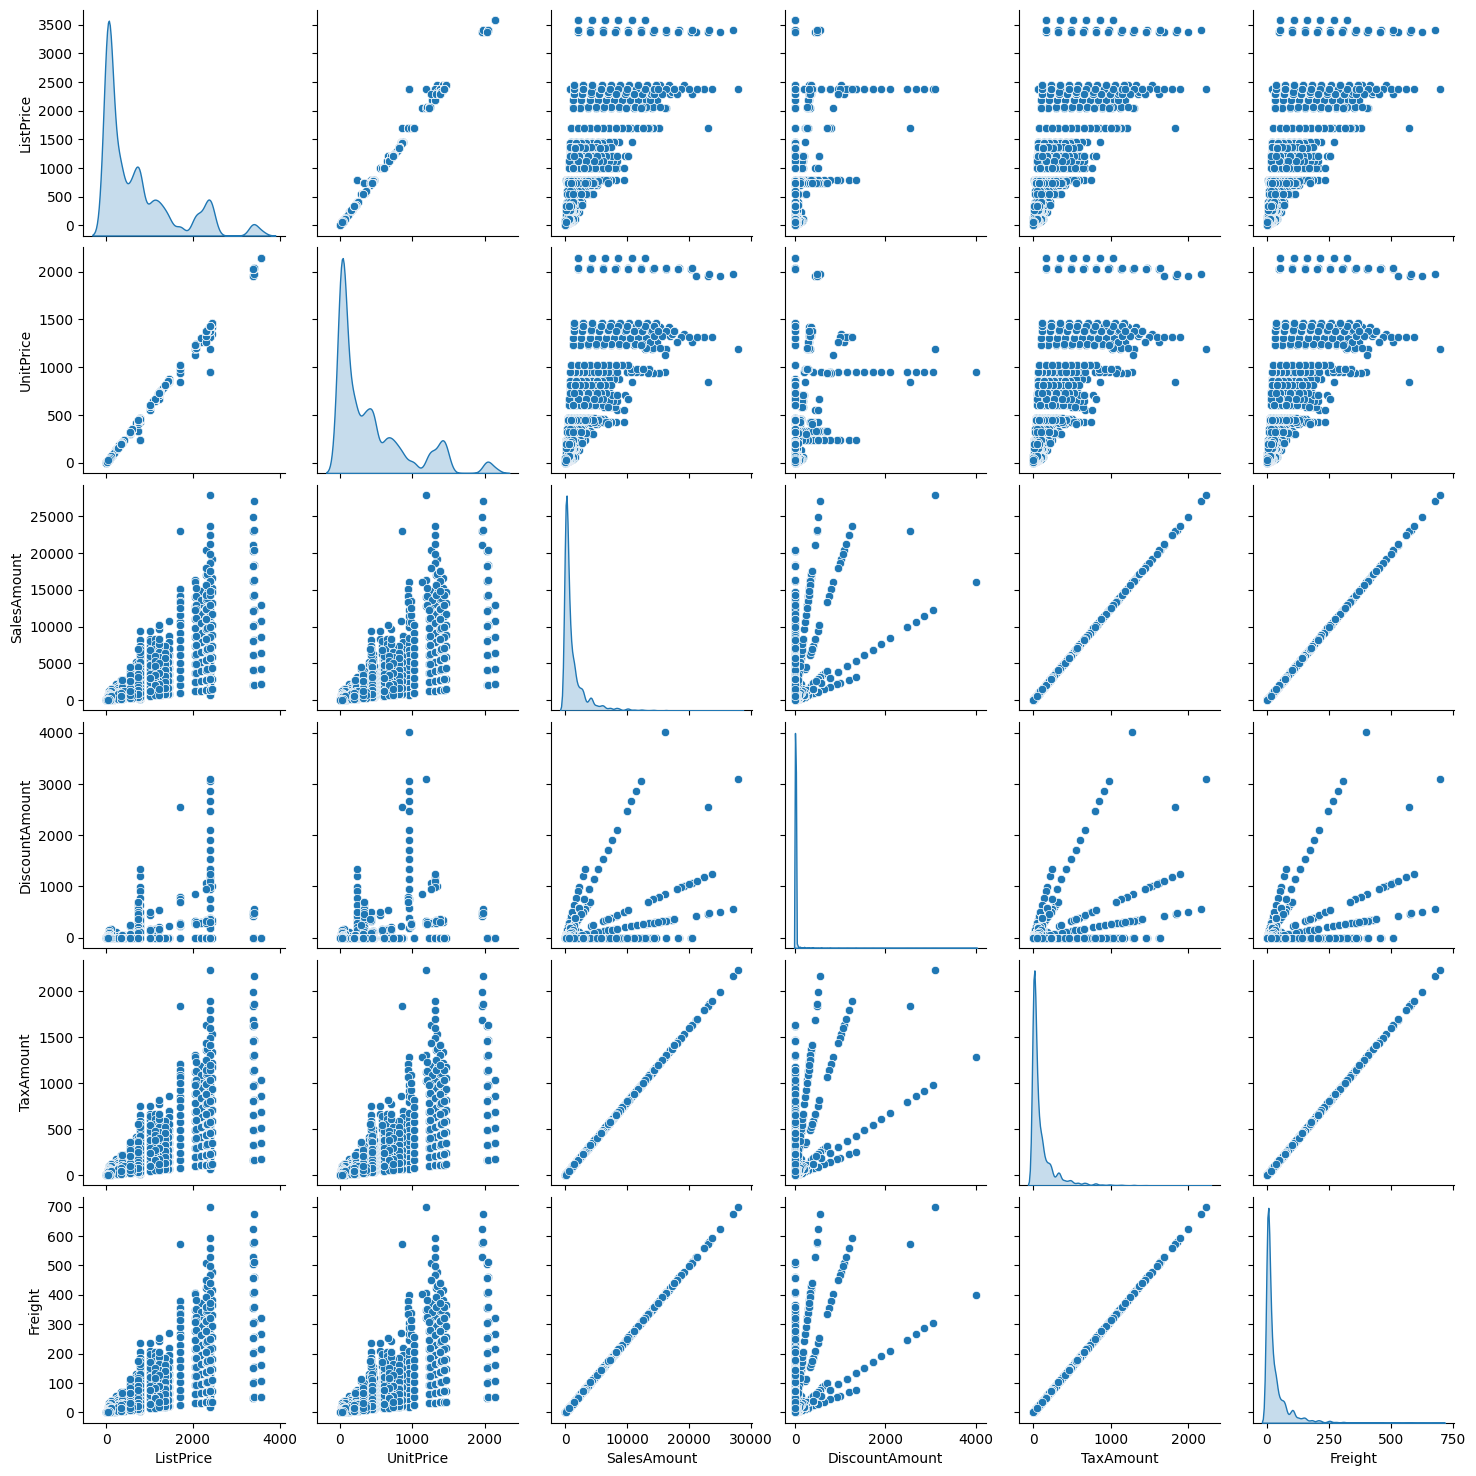

In [112]:
sns.pairplot(df,diag_kind='kde')

In [24]:
Processes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32040 entries, 0 to 32039
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderNumber     32040 non-null  int32         
 1   ProductName     32040 non-null  int32         
 2   Color           32040 non-null  int32         
 3   Category        32040 non-null  int32         
 4   Subcategory     32040 non-null  int32         
 5   ListPrice       32032 non-null  float64       
 6   Orderdate       32040 non-null  datetime64[ns]
 7   Duedate         32040 non-null  datetime64[ns]
 8   Shipdate        32040 non-null  datetime64[ns]
 9   PromotionName   32040 non-null  int32         
 10  SalesRegion     32040 non-null  int32         
 11  OrderQuantity   32040 non-null  int32         
 12  UnitPrice       32040 non-null  float64       
 13  SalesAmount     32040 non-null  float64       
 14  DiscountAmount  32040 non-null  float64       
 15  Ta

<Axes: >

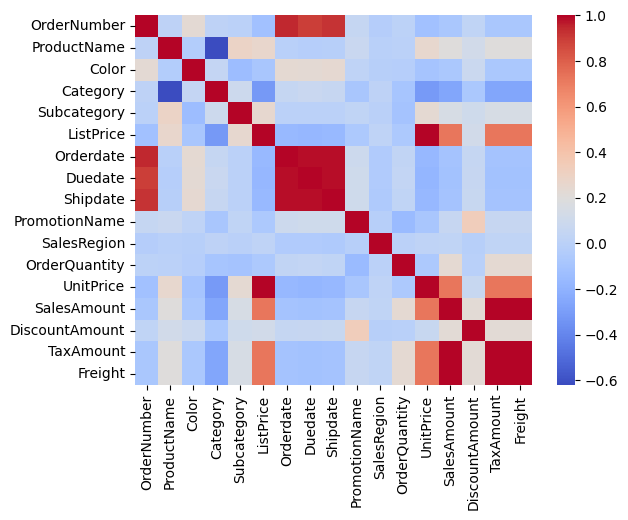

In [29]:
r_df = Processes_df.dropna()
corr_matrix = r_df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')

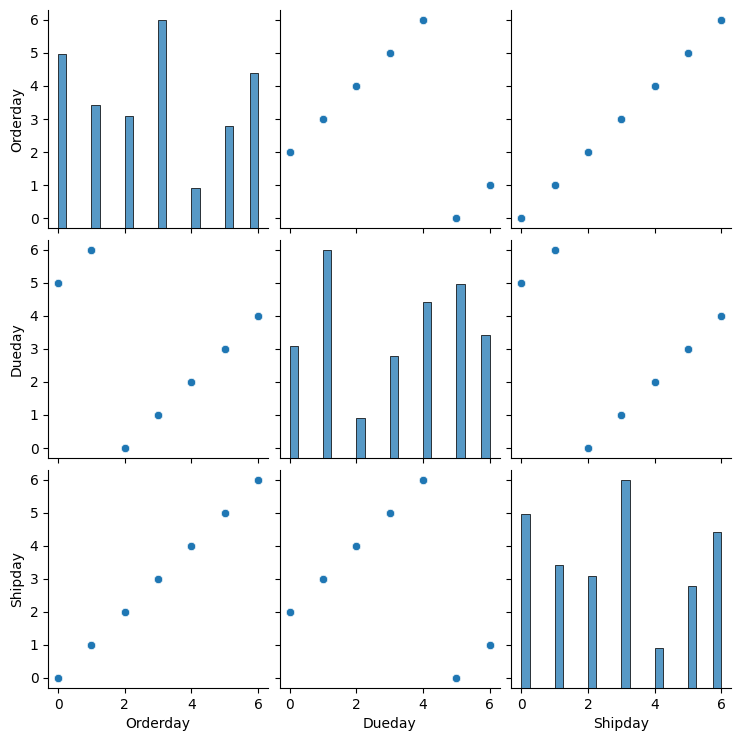

In [127]:
df['Orderday'] = df['Orderdate'].dt.dayofweek
df['Dueday'] = df['Duedate'].dt.dayofweek
df['Shipday'] = df['Shipdate'].dt.dayofweek

sns.pairplot(df[['Orderday', 'Dueday', 'Shipday']])
plt.show()

# Observstion
<ul>
<li>
Orderday vs. Dueday:

The scatterplot shows a positive linear trend, indicating that orders placed earlier correspond to earlier due dates.
The points align closely to a line, suggesting a strong correlation between these two variables.</li>
<li>
Orderday vs. Shipday:

This plot also shows a positive linear relationship, meaning earlier orders tend to be shipped earlier.
Some variation suggests a slight delay or flexibility in shipping timelines.</li>
<li>
Dueday vs. Shipday:

A similar positive trend is observed. Shipdays correspond closely to due dates, indicating timely shipping practices.
Minor deviations could represent slight delays or early shipping in specific cases.</li>
<li>
Other Off-Diagonal Relationships:

The trends are consistent across scatterplots, emphasizing high correlations among "Orderday," "Dueday," and "Shipday."</li>
<li>
From the heatmap we can know that there is no significant correlation between the features</li>
</ul>

In [167]:
def Encode(df):
    objColumns =df.select_dtypes(include = 'object').columns
    labelS = {}
    for col in objColumns:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])
        labelS[col] = label
    return labelS



In [169]:
Processes_df = df.copy()
label= Encode(Processes_df)
Processes_df.head()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,Orderday,Dueday,Shipday
0,0,115,4,1,10,3399.9900,2011-01-29,2011-02-10,2011-02-05,0,2,11,2039.9940,4079.9880,0.0,326.3990,101.9997,5,3,5
1,0,111,0,1,10,3374.9900,2011-01-29,2011-02-10,2011-02-05,0,2,11,2024.9940,4049.9880,0.0,323.9990,101.2497,5,3,5
2,0,17,4,3,11,1204.3248,2011-01-29,2011-02-10,2011-02-05,0,2,11,722.5949,1445.1898,0.0,115.6152,36.1297,5,3,5
4,0,15,4,3,11,1204.3248,2011-01-29,2011-02-10,2011-02-05,0,2,11,722.5949,1445.1898,0.0,115.6152,36.1297,5,3,5
5,0,18,4,3,11,1364.5000,2011-01-29,2011-02-10,2011-02-05,0,2,0,818.7000,818.7000,0.0,65.4960,20.4675,5,3,5


In [183]:
Processes_df

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,Orderday,Dueday,Shipday
0,0,115,4,1,10,3399.9900,2011-01-29,2011-02-10,2011-02-05,0,2,11,2039.9940,4079.9880,0.0,326.3990,101.9997,5,3,5
1,0,111,0,1,10,3374.9900,2011-01-29,2011-02-10,2011-02-05,0,2,11,2024.9940,4049.9880,0.0,323.9990,101.2497,5,3,5
2,0,17,4,3,11,1204.3248,2011-01-29,2011-02-10,2011-02-05,0,2,11,722.5949,1445.1898,0.0,115.6152,36.1297,5,3,5
4,0,15,4,3,11,1204.3248,2011-01-29,2011-02-10,2011-02-05,0,2,11,722.5949,1445.1898,0.0,115.6152,36.1297,5,3,5
5,0,18,4,3,11,1364.5000,2011-01-29,2011-02-10,2011-02-05,0,2,0,818.7000,818.7000,0.0,65.4960,20.4675,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,1827,197,1,1,18,2384.0700,2013-06-30,2013-07-12,2013-07-07,0,6,11,1430.4420,2860.8840,0.0,228.8707,71.5221,6,4,6
32036,1827,205,1,1,18,1214.8500,2013-06-30,2013-07-12,2013-07-07,0,6,0,728.9100,728.9100,0.0,58.3128,18.2228,6,4,6
32037,1827,33,1,3,19,1003.9100,2013-06-30,2013-07-12,2013-07-07,0,6,11,602.3460,1204.6920,0.0,96.3754,30.1173,6,4,6
32038,1827,204,1,1,18,1214.8500,2013-06-30,2013-07-12,2013-07-07,0,6,11,728.9100,1457.8200,0.0,116.6256,36.4455,6,4,6


In [190]:
X = Processes_df.drop(columns=['SalesAmount','Duedate','Orderdate','Shipdate']) 
y = Processes_df['SalesAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [193]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 115.41
R² Score: 1.00


# Interpretation of the Results:
<ol>
<li>Mean Absolute Error (MAE): 0.36

On average, your model's predictions deviate by 0.36 units from the actual target values. A lower MAE is better, as it suggests smaller errors in prediction.
</li>
<li>Mean Squared Error (MSE): 115.41

MSE emphasizes larger errors more than MAE because it squares the error values. An MSE of 115.41 may indicate that there are a few outliers or significant deviations in predictions for some data points.
</li>
<li>R² Score: 1.00 <br>
<ul>
<li>An R² score of 1.00 indicates a perfect fit</li>
<li>model explains 100% of the variance in the target values. However, a perfect R² can sometimes indicate overfitting (especially if the test dataset is small
</li>

</ul>
</li>
</ol>